In [1]:
import matplotlib.pyplot as plt
import matplotlib as mtp
import math
import time
import numpy as np
from numpy import *
from collections import Counter
from scipy import interpolate
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from matplotlib.backends.backend_pdf import PdfPages
import sys
import os
import pylab
from matplotlib import rc
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
#import illustris_python as il
import seaborn as sns
import h5py
import os.path
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd

In [2]:
font_size=18
mtp.rcParams['figure.figsize'] = [10, 10]
mtp.rcParams['font.size'] = font_size
mtp.rcParams['axes.labelsize'] = font_size
mtp.rcParams['axes.linewidth'] = font_size/10.
mtp.rcParams['axes.titlesize'] = 15
mtp.rcParams['legend.fontsize'] = font_size
mtp.rcParams['xtick.labelsize'] = font_size
mtp.rcParams['ytick.labelsize'] = font_size
mtp.rcParams['xtick.major.size']=8
mtp.rcParams['xtick.major.width']=2
mtp.rcParams['xtick.minor.size']=3
mtp.rcParams['xtick.minor.width']=2
mtp.rcParams['ytick.major.size']=8
mtp.rcParams['ytick.major.width']=2
mtp.rcParams['ytick.minor.size']=3
mtp.rcParams['ytick.minor.width']=2

In [3]:
L_box=50.
cte_h=0.6774
h=cte_h
cte_G=6.67408*10**-8 ## cm3 g-1 s-2
cte_m_p=1.6726*10**-24 ## g
cte_eps_r=0.1
cte_sigma_t=6.6524*10**-25 ## cm2
cte_c=2.998*10**10 ## cm s-1

#cosmo = FlatLambdaCDM(H0=cte_h*100. * u.km / u.s / u.Mpc, Om0=0.3)

[1.73169214e+10 1.29552886e+10 8.20140906e+09 4.73114024e+09
 3.24054787e+09 1.43535699e+09 6.32324198e+08 6.13843453e+07
 1.67863030e+08 1.11034872e+08 5.31056211e+07 2.30123584e+07
 1.18777527e+07 7.86137768e+06 4.64700483e+06 2.68631642e+06
 3.95103913e+05 0.00000000e+00]
[2.12300781e+10 1.69407663e+10 1.16436169e+10 8.61459138e+09
 6.63518175e+09 3.56085596e+09 1.74453640e+09 1.26682099e+09
 7.39544146e+08 3.84035194e+08 1.98393582e+08 8.08715759e+07
 5.10929799e+07 4.05448066e+07 1.59685938e+07 5.30317376e+06
 1.56454453e+06 0.00000000e+00]
[1.03865735e+09 7.72294749e+08 5.19008115e+08 3.32168831e+08
 2.56153249e+08 1.64993088e+08 8.11474462e+07 5.83192643e+07
 3.47316262e+07 1.62285124e+07 9.51718285e+06 6.91676118e+06
 7.16447198e+06 3.56587916e+06 1.29717209e+06 9.40356298e+05
 2.67902204e+05]
[1.05308754e+09 8.72444895e+08 7.52387654e+08 5.82519750e+08
 5.32249944e+08 3.88762365e+08 2.94317181e+08 2.44646149e+08
 1.67040100e+08 1.31432685e+08 6.80006676e+07 6.84536228e+06
 7.1

C:\Users\clara\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in log10
C:\Users\clara\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in log10


[6.85246913e+08 5.92874122e+08 4.79784724e+08 4.13032378e+08
 3.68418837e+08 2.85009345e+08 1.98545242e+08 1.58937732e+08
 1.36032242e+08 1.03359070e+08 7.78786881e+07 6.03372192e+07
 4.49523621e+07 2.90739103e+07 1.60531590e+07 6.10069562e+06
 7.13090516e+05 0.00000000e+00]
[1.72960748e+10 1.08020396e+10 6.62816365e+09 3.41904020e+09
 1.99834471e+09 4.15373498e+08 3.18950595e+08 3.11397121e+08
 2.27321240e+08 1.56208395e+08 1.16804253e+08 6.97182044e+07
 3.87222314e+07 1.72662844e+07 5.40745862e+06 2.92625482e+06
 9.99355786e+05 2.82227430e+05]
[1.48135140e+10 1.06599845e+10 6.99263892e+09 4.27758400e+09
 3.23379329e+09 1.50501376e+09 8.46710420e+08 7.35219477e+08
 5.36693235e+08 3.94554355e+08 2.16657390e+08 9.85383554e+07
 5.86087524e+07 2.74105340e+07 9.10194586e+06 2.33953014e+06
 1.56392904e+05 0.00000000e+00]
[4.82058108e+09 3.10517278e+09 1.84767690e+09 1.25940879e+09
 1.06444577e+09 6.51325983e+08 4.12856727e+08 3.44729890e+08
 2.52380526e+08 1.75551624e+08 9.59160376e+07 5.64

<Figure size 1600x1300 with 0 Axes>

<Figure size 1100x2000 with 0 Axes>

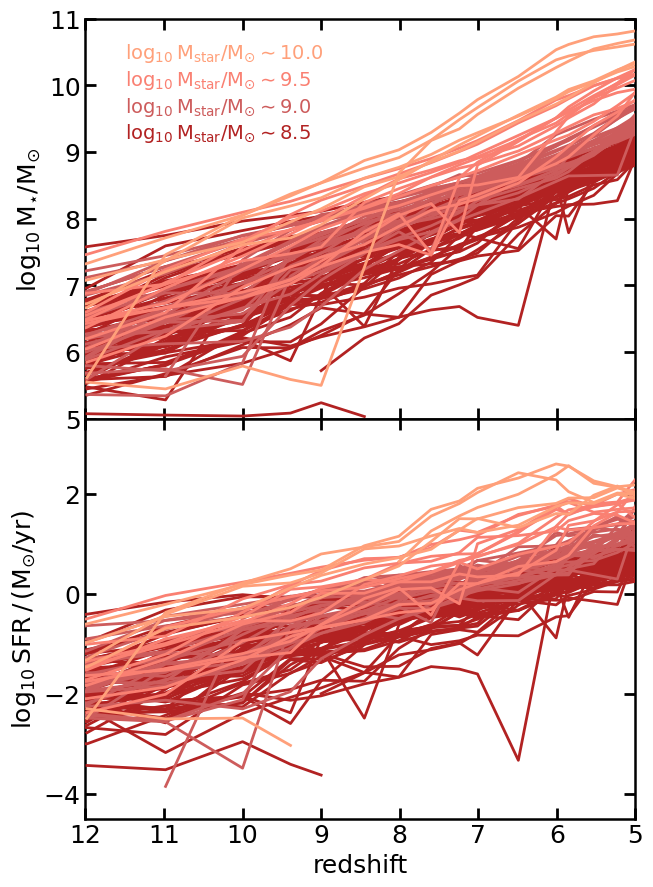

In [8]:
import seaborn as sns
import scipy.stats as st
import pandas as pd
mtp.rcParams['figure.figsize']=[16,13]
fig=plt.figure()


#### SYMBOLS and COLORS for different galaxy stellar masses.
mstar_filter_lo=[1.,      10**8.25,10**8.75,10**9.25,10**9.75 ,10**10.25]#, 10**10.75]
mstar_filter_up=[10**8.25,10**8.75,10**9.25,10**9.75,10**10.25,10**11]#, 10**11.25]
colorr=['black','darkblue','steelblue','deepskyblue','teal','lightseagreen']
colorr=['black','darkred','firebrick','indianred','salmon','lightsalmon']
markerr=['o','P','v','^','s','s']
siz=[10,90,90,90,90,90]
ss=90
ss2=30

### Importing catalogs

df = pd.read_csv('TNG_50_library/magnitudes_galaxies.txt', header=None,
                 names=['ID','redshift','LTT','tz ','dm','F070W','F090W','F115W','F150W','F200W',
                        'F277W','F356W','F444W','F0560W','F0770W','F1000W','F1130W',
                        'F1280W','F1500W','F1800W','F2100W','F2550W'],dtype=float)
mass = pd.read_csv('TNG_50_library/library_galaxies.txt',header=None,
                    names=['galaxy number','age end SFR','Mstar end SFR','BH mass','BH Lum'])


df2 = pd.read_csv('TNG_50_library/magnitudes_galaxies_with_BH.txt', header=None,
                 names=['ID','redshift','LTT','tz ','dm','F070W','F090W','F115W','F150W','F200W',
                        'F277W','F356W','F444W','F0560W','F0770W','F1000W','F1130W',
                        'F1280W','F1500W','F1800W','F2100W','F2550W'],dtype=float)
mass2 = pd.read_csv('TNG_50_library/library_galaxies_with_BH.txt',header=None,
                    names=['galaxy number','age end SFR','Mstar end SFR','BH mass','BH Lum'])


## Melanie's file importation
##gal_ID_z5,Age_z5,Mstar_z5,mbh_z5,Lbol_z5 =np.genfromtxt('Magnitudes/library_galaxies.txt', unpack=True,delimiter=',')
##gal_ID_z7,Age_z7,Mstar_z7,mbh_z7,Lbol_z7 =np.genfromtxt('Magnitudes/library_galaxies_z7.txt', unpack=True,delimiter=',')

out_TNG=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
red_TNG=[11.98,10.98,10.00,9.39,9.00,8.45,8.01,7.60,7.24,7.01,6.49,6.01,5.85,5.53,5.23,5.00]


mstar_filter_lo=[1.,      10**8.25,10**8.75,10**9.25,10**9.75 ,10**10.25]#, 10**10.75]
mstar_filter_up=[10**8.25,10**8.75,10**9.25,10**9.75,10**10.25,10**11]#, 10**11.25]
#colorr=['black','darkblue','steelblue','deepskyblue','teal','lightseagreen']
colorr=['black','darkred','firebrick','indianred','salmon','lightsalmon']
markerr=['o','P','v','^','s','s']
siz=[10,90,90,90,90,90]
ss=90
ss2=10
zzorder=[10,11,12,13,14,15]



i=15
#index_gal_red5=gal_ID_z5
index_gal_red5 = df['ID'].to_numpy()
mtp.rcParams['figure.figsize']=[11,20]
fig=plt.figure()

gs1=gridspec.GridSpec(2,1)
gs1.update(left=0.1,right=0.6, bottom=0.2, top=0.6, hspace=0.00001, wspace=0.00001)

plt.figure()
ax1=plt.subplot(gs1[0])
ax2=plt.subplot(gs1[1])
ax1.tick_params(axis='both',which='both',direction='in',bottom=True,top=True,left=True,right=True)
ax2.tick_params(axis='both',which='both',direction='in',bottom=True,top=True,left=True,right=True)



for k in index_gal_red5:
    filename_gal='Files_SFRH_TNG50/Files_SFRH_TNG50/SFH_TNG50_out_'+str(out_TNG[i])+'_gal_'+str(int(k))+'.txt'
    #print filename_gal
    if os.path.exists(filename_gal):

        snap,red,galid,bh_mass,bh_acc,L_bol_1,Lbol_2, L_xray_1, L_xray_2, mstar, mgas, sfr, metallicity = np.loadtxt(filename_gal,unpack=True)

        print(mstar)
        for ppp in range(6):
            if mstar[0]>=mstar_filter_lo[ppp] and mstar[0]<mstar_filter_up[ppp]:
                color_to_plot=colorr[ppp]
                zorder_to_plot=zzorder[ppp]
                continue


        ax1.plot(red,np.log10(mstar),color=color_to_plot,lw=2,alpha=1,zorder=zorder_to_plot)
        ax2.plot(red,np.log10(sfr),color=color_to_plot,lw=2,alpha=1,zorder=zorder_to_plot)

#ax1.semilogy()
#ax2.semilogy()
ax1.set_xlim(5,12)
ax2.set_xlim(5,12)
ax1.set_ylim(5,11)
ax2.set_ylim(-4.5,3.5)
ax1.set_ylabel(r'$\rm log_{10}\, M_{\star}/M_{\odot}$')
ax1.text(11.5,9.2,r'$\rm log_{10}\, M_{star}/M_{\odot}\sim 8.5$',color=colorr[2],fontsize=14)
ax1.text(11.5,9.6,r'$\rm log_{10}\, M_{star}/M_{\odot}\sim 9.0$',color=colorr[3],fontsize=14)
ax1.text(11.5,10,r'$\rm log_{10}\, M_{star}/M_{\odot}\sim 9.5$',color=colorr[4],fontsize=14)
ax1.text(11.5,10.4,r'$\rm log_{10}\, M_{star}/M_{\odot}\sim 10.0$',color=colorr[5],fontsize=14)
ax2.set_ylabel(r'$\rm log_{10}\, SFR\, /\,(M_{\odot}/yr)$')
ax2.set_xlabel(r'redshift')
ax1.set_xticklabels([])
ax1.invert_xaxis()
ax2.invert_xaxis()
plt.savefig('SFRH.pdf',transparent=True)